# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Load Data

In [2]:
dummy_df = pd.read_csv('dummy_df.csv')

In [3]:
dummy_df.shape

(5877, 31)

In [4]:
dummy_df.head()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Churn,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,34,56.95,1889.50,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,2,70.70,151.65,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,8,99.65,820.50,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,1,0,22,89.10,1949.40,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0


## Splitting our Data

In [5]:
# Establish target feature, churn
y = dummy_df.Churn.values
# Drop the target feature from remaining features
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list, we will need them in next step
cols = X.columns

In [6]:
y

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [7]:
X.head()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,34,56.95,1889.50,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,2,53.85,108.15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,2,70.70,151.65,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,8,99.65,820.50,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,1,0,22,89.10,1949.40,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0


## Feature Scaling

In [8]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.464789,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.014085,0.354229,0.010310,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.098592,0.809950,0.092511,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.295775,0.704975,0.222779,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Customer Segmentation - use is as a future to predict customer churn

# K-means Clustering

## Elbow Method

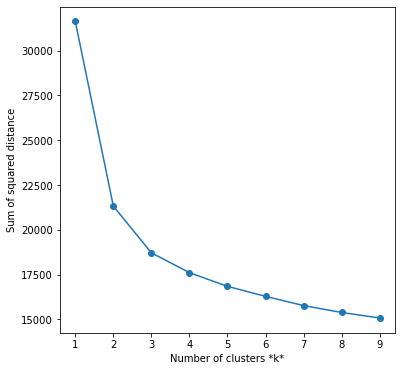

In [10]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [11]:
# The graph above shows that k=2 is not a bad choice.

## Silhouette Analysis

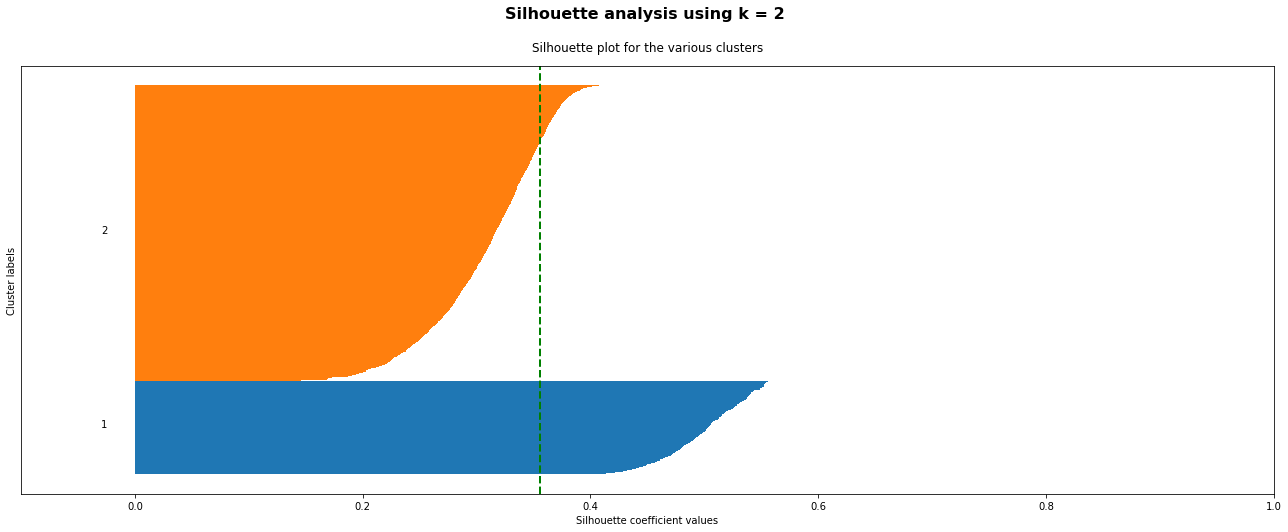

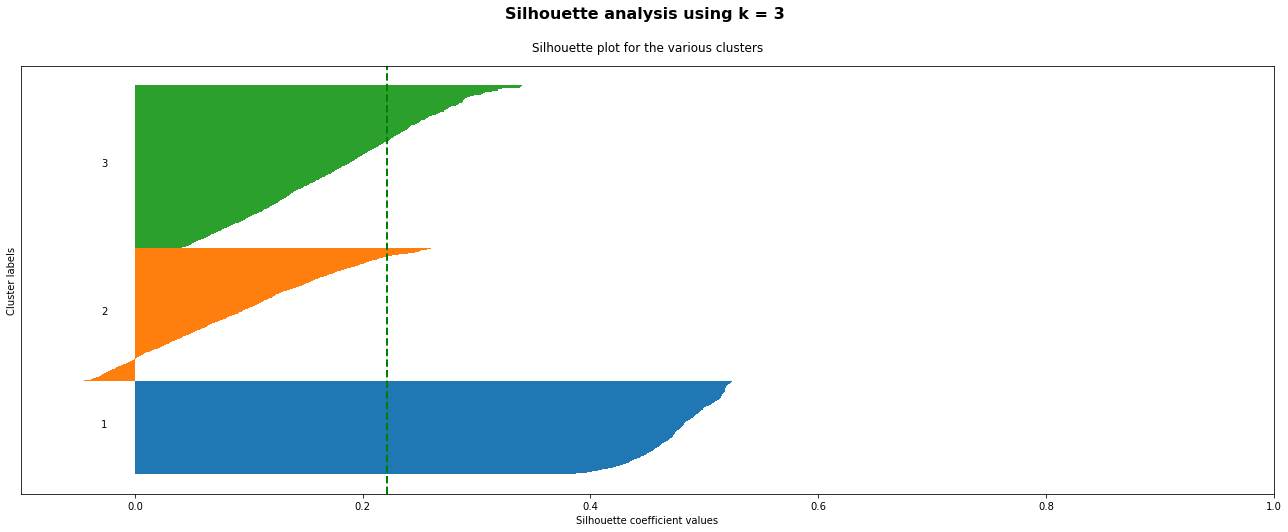

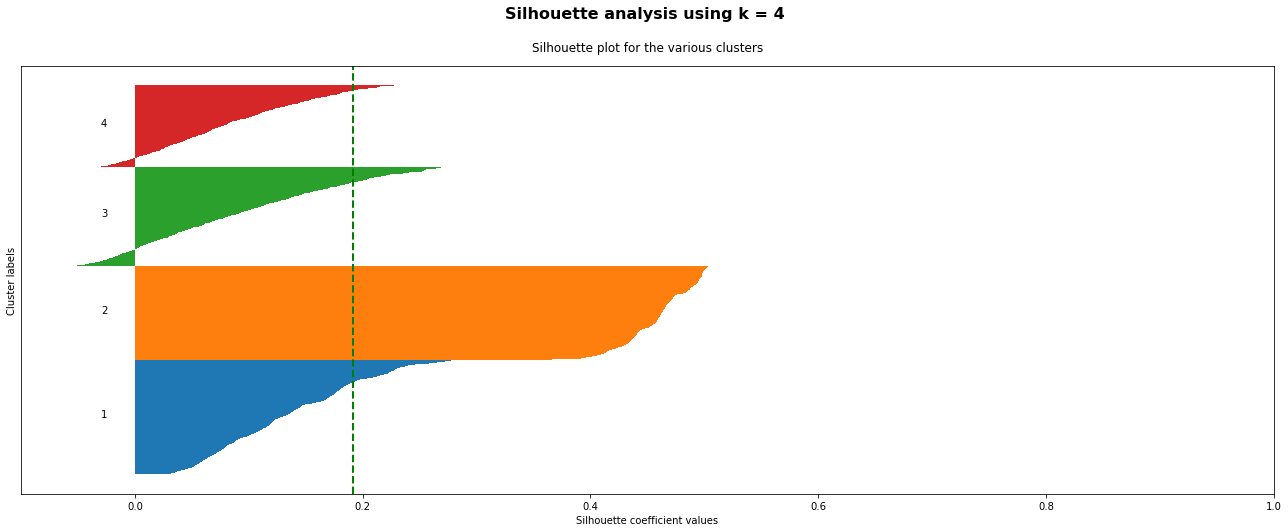

In [49]:

for i, k in enumerate([2, 3, 4]):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [12]:
# As the above plots show, n_clusters=2 has the best average silhouette score of around 0.28 and all clusters being above the average shows that it is actually a good choice. 
# Also, the thickness of the silhouette plot gives an indication of how big each cluster is. The plot shows that cluster 1 has almost triple the samples than cluster 2. 
# However, as we increased n_clusters to 3 and 4, the average silhouette score decreased to around 0..22 and 0.19 respectively. 
# Moreover, the thickness of silhouette plot started showing wide fluctuations. 
# The bottom line is: Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score.

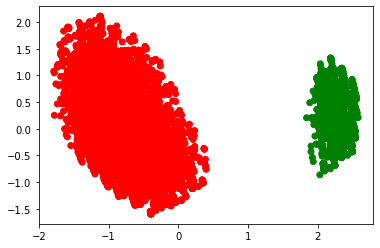

In [13]:
import sklearn.decomposition
import matplotlib.colors

# Make a variable called model. We want n_clusters = 3 as parameter to sklearn.cluster.KMeans 
model = sklearn.cluster.KMeans(n_clusters=2)
# Call a fit_predict() on X 
cluster_assignments = model.fit_predict(X)

# Let's visualiaze with colors.ListedColormap
cmap = matplotlib.colors.ListedColormap(['red', 'green'])

# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

In [14]:
cluster_assignments.shape

(5877,)

In [15]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.464789,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.014085,0.354229,0.010310,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.098592,0.809950,0.092511,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.295775,0.704975,0.222779,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [16]:
X['44'] = cluster_assignments.tolist()

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,44
0,1.0,0.0,0.464789,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1.0,0.0,0.014085,0.354229,0.010310,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.0,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,0.0,0.0,0.098592,0.809950,0.092511,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,1.0,0.0,0.295775,0.704975,0.222779,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [18]:
X.shape

(5877, 31)

## Train — Test — Split

In [19]:
from sklearn.model_selection import train_test_split
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
# predict future values
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## Evaluating Model Performance

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix_train = confusion_matrix(y_train, y_hat_train)
cnf_matrix_test = confusion_matrix(y_test, y_hat_test)

In [23]:
print(cnf_matrix_train)

[[2907  336]
 [ 532  632]]


In [24]:
print(cnf_matrix_test)

[[984  89]
 [186 211]]


### Classification Report

In [25]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train, y_hat_train)
report_test = classification_report(y_test, y_hat_test)

In [26]:
print(report_train)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3243
           1       0.65      0.54      0.59      1164

    accuracy                           0.80      4407
   macro avg       0.75      0.72      0.73      4407
weighted avg       0.79      0.80      0.80      4407



In [27]:
print(report_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1073
           1       0.70      0.53      0.61       397

    accuracy                           0.81      1470
   macro avg       0.77      0.72      0.74      1470
weighted avg       0.80      0.81      0.80      1470



### AUC - Area Under Curve

In [28]:
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [29]:
# calculate AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.860


In [30]:
from sklearn.metrics import roc_curve, auc
# Calculate fpr, tpr, and thresholds for test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, lr_probs)

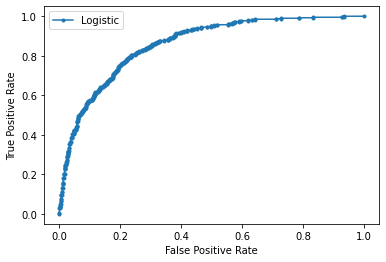

In [31]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(test_fpr, test_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Tune Hyperparameters

In [32]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805686 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805686 (0.015618) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805686 (0.015618) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.805686 (0.015532) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.805402 (0.015112) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805402 (0.015112) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.805459 (0.015123) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.803871 (0.014697) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.803871 (0.014697) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.803928 (0.014968) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.803361 (0.014793) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.803361 (0.014793) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802963 (0.014755) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.795704 (0.014583) wit

## LogisticRegression with best hyperparameters

In [33]:
logreg_best = LogisticRegression(C=100, penalty='l2', solver = 'newton-cg')
logreg_best.fit(X_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [34]:
# predict future values
y_hat_test_best = logreg_best.predict(X_test)

### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix_test_best = confusion_matrix(y_test, y_hat_test_best)

In [36]:
print(cnf_matrix_test_best)

[[988  85]
 [181 216]]


### Classification Report

In [37]:
report_test_best = classification_report(y_test, y_hat_test_best)

In [38]:
print(report_test_best)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1073
           1       0.72      0.54      0.62       397

    accuracy                           0.82      1470
   macro avg       0.78      0.73      0.75      1470
weighted avg       0.81      0.82      0.81      1470



In [39]:
print(report_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1073
           1       0.70      0.53      0.61       397

    accuracy                           0.81      1470
   macro avg       0.77      0.72      0.74      1470
weighted avg       0.80      0.81      0.80      1470



### AUC - Area Under Curve

In [43]:
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
lr_probs_best = logreg_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_best = lr_probs_best[:, 1]

In [44]:
# calculate best AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.860


In [45]:
# calculate best AUC
lr_auc_best = roc_auc_score(y_test, lr_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (lr_auc_best))

Logistic: ROC AUC_best=0.861


In [46]:
from sklearn.metrics import roc_curve, auc
# Calculate fpr, tpr, and thresholds for test set
test_fpr_best, test_tpr_best, test_thresholds_best = roc_curve(y_test, lr_probs_best)

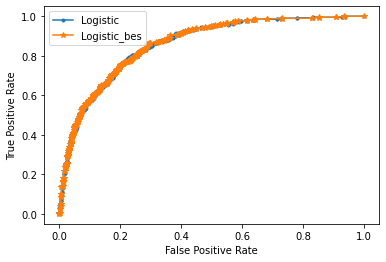

In [47]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(test_fpr, test_tpr, marker='.', label='Logistic')
pyplot.plot(test_fpr_best, test_tpr_best, marker='*', label='Logistic_bes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# K-Nearest Neighbors (KNN)

In [ ]:
# Grid searching the key hyperparameters
from sklearn.neighbors import KNeighborsClassifier
# define dataset
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## K-Nearest Neighbors (KNN) with best hyperparameters

In [ ]:
knn_best = KNeighborsClassifier(metric='manhattan' , n_neighbors=19, weights='uniform')
knn_best.fit(X_train, y_train)

In [ ]:
# predict future values
knn_y_hat_test_best = knn_best.predict(X_test)

## Confusion Matrix - KNN

In [ ]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
knn_cnf_matrix_test_best = confusion_matrix(y_test, knn_y_hat_test_best)

In [ ]:
print(knn_cnf_matrix_test_best)

## Classification Report - KNN

In [ ]:
knn_report_test_best = classification_report(y_test, knn_y_hat_test_best)

In [ ]:
print(knn_report_test_best)

## AUC - Area Under Curve - KNN

In [ ]:
from sklearn.metrics import roc_auc_score
# predict probabilities
knn_probs_best = knn_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs_best = knn_probs_best[:, 1]

In [ ]:
# calculate best AUC
knn_auc_best = roc_auc_score(y_test, knn_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (knn_auc_best))

In [ ]:
from sklearn.metrics import roc_curve, auc
# Calculate fpr, tpr, and thresholds for test set
knn_test_fpr_best, knn_test_tpr_best, knn_test_thresholds_best = roc_curve(y_test, knn_probs_best)

In [ ]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(knn_test_fpr_best, knn_test_tpr_best, marker='*', label='knn_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## Random Forest Classifier with best hyperparameters

In [ ]:
rfc_best = RandomForestClassifier(max_features='sqrt', n_estimators= 100)
rfc_best.fit(X_train, y_train)

In [ ]:
# predict future values
rfc_y_hat_test_best = rfc_best.predict(X_test)

## Confusion Matrix - RFC

In [ ]:
# Pass actual test and predicted target test outcomes to function
rfc_cnf_matrix_test_best = confusion_matrix(y_test, rfc_y_hat_test_best)

In [ ]:
print(rfc_cnf_matrix_test_best)

## Classification Report - RFC

In [ ]:
rfc_report_test_best = classification_report(y_test, rfc_y_hat_test_best)

In [ ]:
print(rfc_report_test_best)

## AUC - Area Under Curve - RCF

In [ ]:
# predict probabilities
rfc_probs_best = rfc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs_best = rfc_probs_best[:, 1]

In [ ]:
# calculate best AUC
rfc_auc_best = roc_auc_score(y_test, rfc_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (rfc_auc_best))

In [ ]:
# Calculate fpr, tpr, and thresholds for test set
rfc_test_fpr_best, rfc_test_tpr_best, rfc_test_thresholds_best = roc_curve(y_test, rfc_probs_best)

In [ ]:
# plot the roc curve for the model
pyplot.plot(rfc_test_fpr_best, rfc_test_tpr_best, marker='*', label='rfc_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Stochastic Gradient Boosting - XGBoost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805913 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.734388 (0.000507) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.734388 (0.000507) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.734388 (0.000507) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.734388 (0.000507) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.734388 (0.000507) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.734388 (0.000507) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.783794 (0.010818) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.783850 (0.010741) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.782601 (0.011039) with: {'learning_rate': 0.001, '

## Stochastic Gradient Boosting with best hyperparameters

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_best = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000, subsample= 0.7)
xgb_best.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=0.7)

In [41]:
# predict future values
xgb_y_hat_test_best = xgb_best.predict(X_test)

## Confusion Matrix - XGB

In [42]:
# Pass actual test and predicted target test outcomes to function
xgb_cnf_matrix_test_best = confusion_matrix(y_test, xgb_y_hat_test_best)

In [43]:
print(xgb_cnf_matrix_test_best)

[[977  96]
 [188 209]]


In [ ]:
# is worse than before adding segmentation

## Classification Report - XGB

In [44]:
xgb_report_test_best = classification_report(y_test, xgb_y_hat_test_best)

In [45]:
print(xgb_report_test_best)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1073
           1       0.69      0.53      0.60       397

    accuracy                           0.81      1470
   macro avg       0.76      0.72      0.73      1470
weighted avg       0.80      0.81      0.80      1470



## AUC - Area Under Curve - XGB

In [46]:
# predict probabilities
xgb_probs_best = xgb_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs_best = xgb_probs_best[:, 1]

In [47]:
# calculate best AUC
xgb_auc_best = roc_auc_score(y_test, xgb_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (xgb_auc_best))

Logistic: ROC AUC_best=0.856


In [48]:
# Calculate fpr, tpr, and thresholds for test set
xgb_test_fpr_best, xgb_test_tpr_best, xgb_test_thresholds_best = roc_curve(y_test, xgb_probs_best)

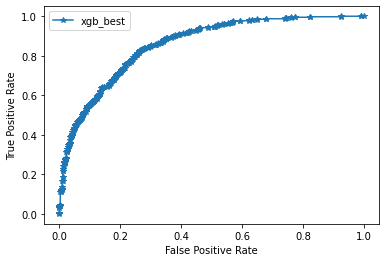

In [58]:
# plot the roc curve for the model
pyplot.plot(xgb_test_fpr_best, xgb_test_tpr_best, marker='*', label='xgb_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/